In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [2]:
raw_data = pd.read_csv('./data/BRC.csv')

In [ ]:
raw_data.head()

In [ ]:
raw_data.shape

In [ ]:
# Работа с пропущенными значениями (NA)
raw_data.isnull().sum()

In [3]:
# Удаляем нежелательную колонку
data = raw_data.drop(['Unnamed: 32'], axis=1)


In [ ]:
data.head()

In [ ]:
# Построим pairplot, чтобы посмотреть отношения переменных
sns.pairplot(data, hue='diagnosis' )

In [ ]:
# Первый вывод, что мы имеем бесполезную переменную id
# Второй, что имеем мультиколениарность переменных описывающих форму опухоли
# (radius_mean/worst,perimeter_mean/worst, area_mean/worst)
# В третьих имеем мультиколинеарность между переменными concave_mean, 
# concavity_points_mean и compactness_mean ну и все worst сюда же

In [4]:
# Соответсвенно удаляем ненужную переменную id и все мультиколинеарные(оставляем по одной))

data = data.drop(['id', 'perimeter_mean', 'perimeter_se','area_mean','area_se',
                 'concavity_mean','concavity_se', 'concave points_mean','concave points_se',
                 'radius_worst','texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst', 
                  'compactness_worst', 'concavity_worst','concave points_worst', 'symmetry_worst', 
                  'fractal_dimension_worst'],axis=1)

In [ ]:
data.head()

In [ ]:
sns.pairplot(data, hue='diagnosis' )

Ну как-то это стало по-лучше выглядеть явно :)

In [5]:
# Затем достаем переменную классифицируемую и переменные для тренировки/предсказаний
y = data.diagnosis
X = data.drop('diagnosis',axis=1)

In [6]:
# Делим выборку на тренировочную и тестовую (67 на 33)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.33)

In [7]:
# фитим модельку
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [8]:
clf = clf.fit(X_train,y_train)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = clf.predict(X_train)
y_pred

array(['M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [10]:
clf.score(X_test,y_test)

0.9202127659574468

In [11]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.95      0.94       121
           M       0.91      0.87      0.89        67

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



Наш классификатор хорош, хорошее соотношение точности и полноты предсказания

In [12]:
# # Меняем буквенные значения на численные у класифицируемой переменной
y_train.replace(to_replace='B',value=0,inplace=True)
y_train.replace(to_replace='M',value=1,inplace=True)
y_test.replace(to_replace='B',value=0,inplace=True)
y_test.replace(to_replace='M',value=1,inplace=True)

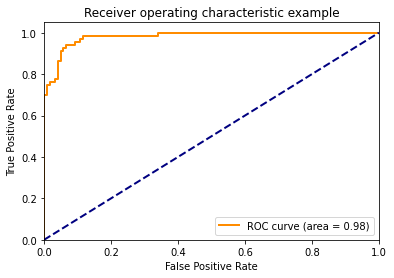

In [13]:
# Для оптимизации пресижн и рекола используют ROC 
y_pred_proba = clf.predict_proba(X_test)

lw=2
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1] )
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
